In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_csv('/content/drive/MyDrive/DONA_DSML_LAB/Breast Cancer (1).csv')

In [5]:
#dropping Id and Unnamed: 32

df=df.drop(['id','Unnamed: 32'],axis=1)

In [6]:
#Remapping the target class

df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

<ipython-input-6-1cff1f42efab>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


dataset balanced or not

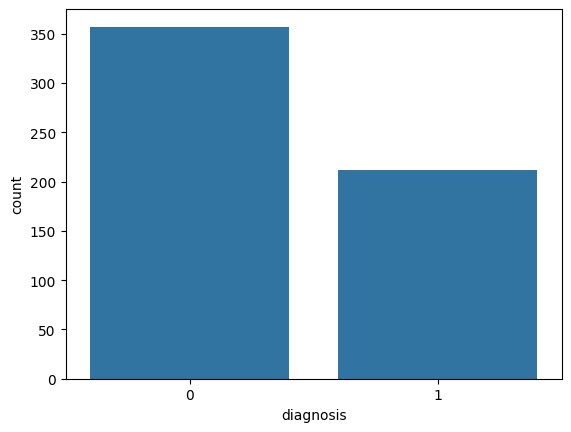

<Figure size 100x100 with 0 Axes>

In [7]:
sns.countplot(x='diagnosis', data=df )
plt.figure(figsize=(1,1))
plt.show()
#dataset is not balanced

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


HISTOGRAM

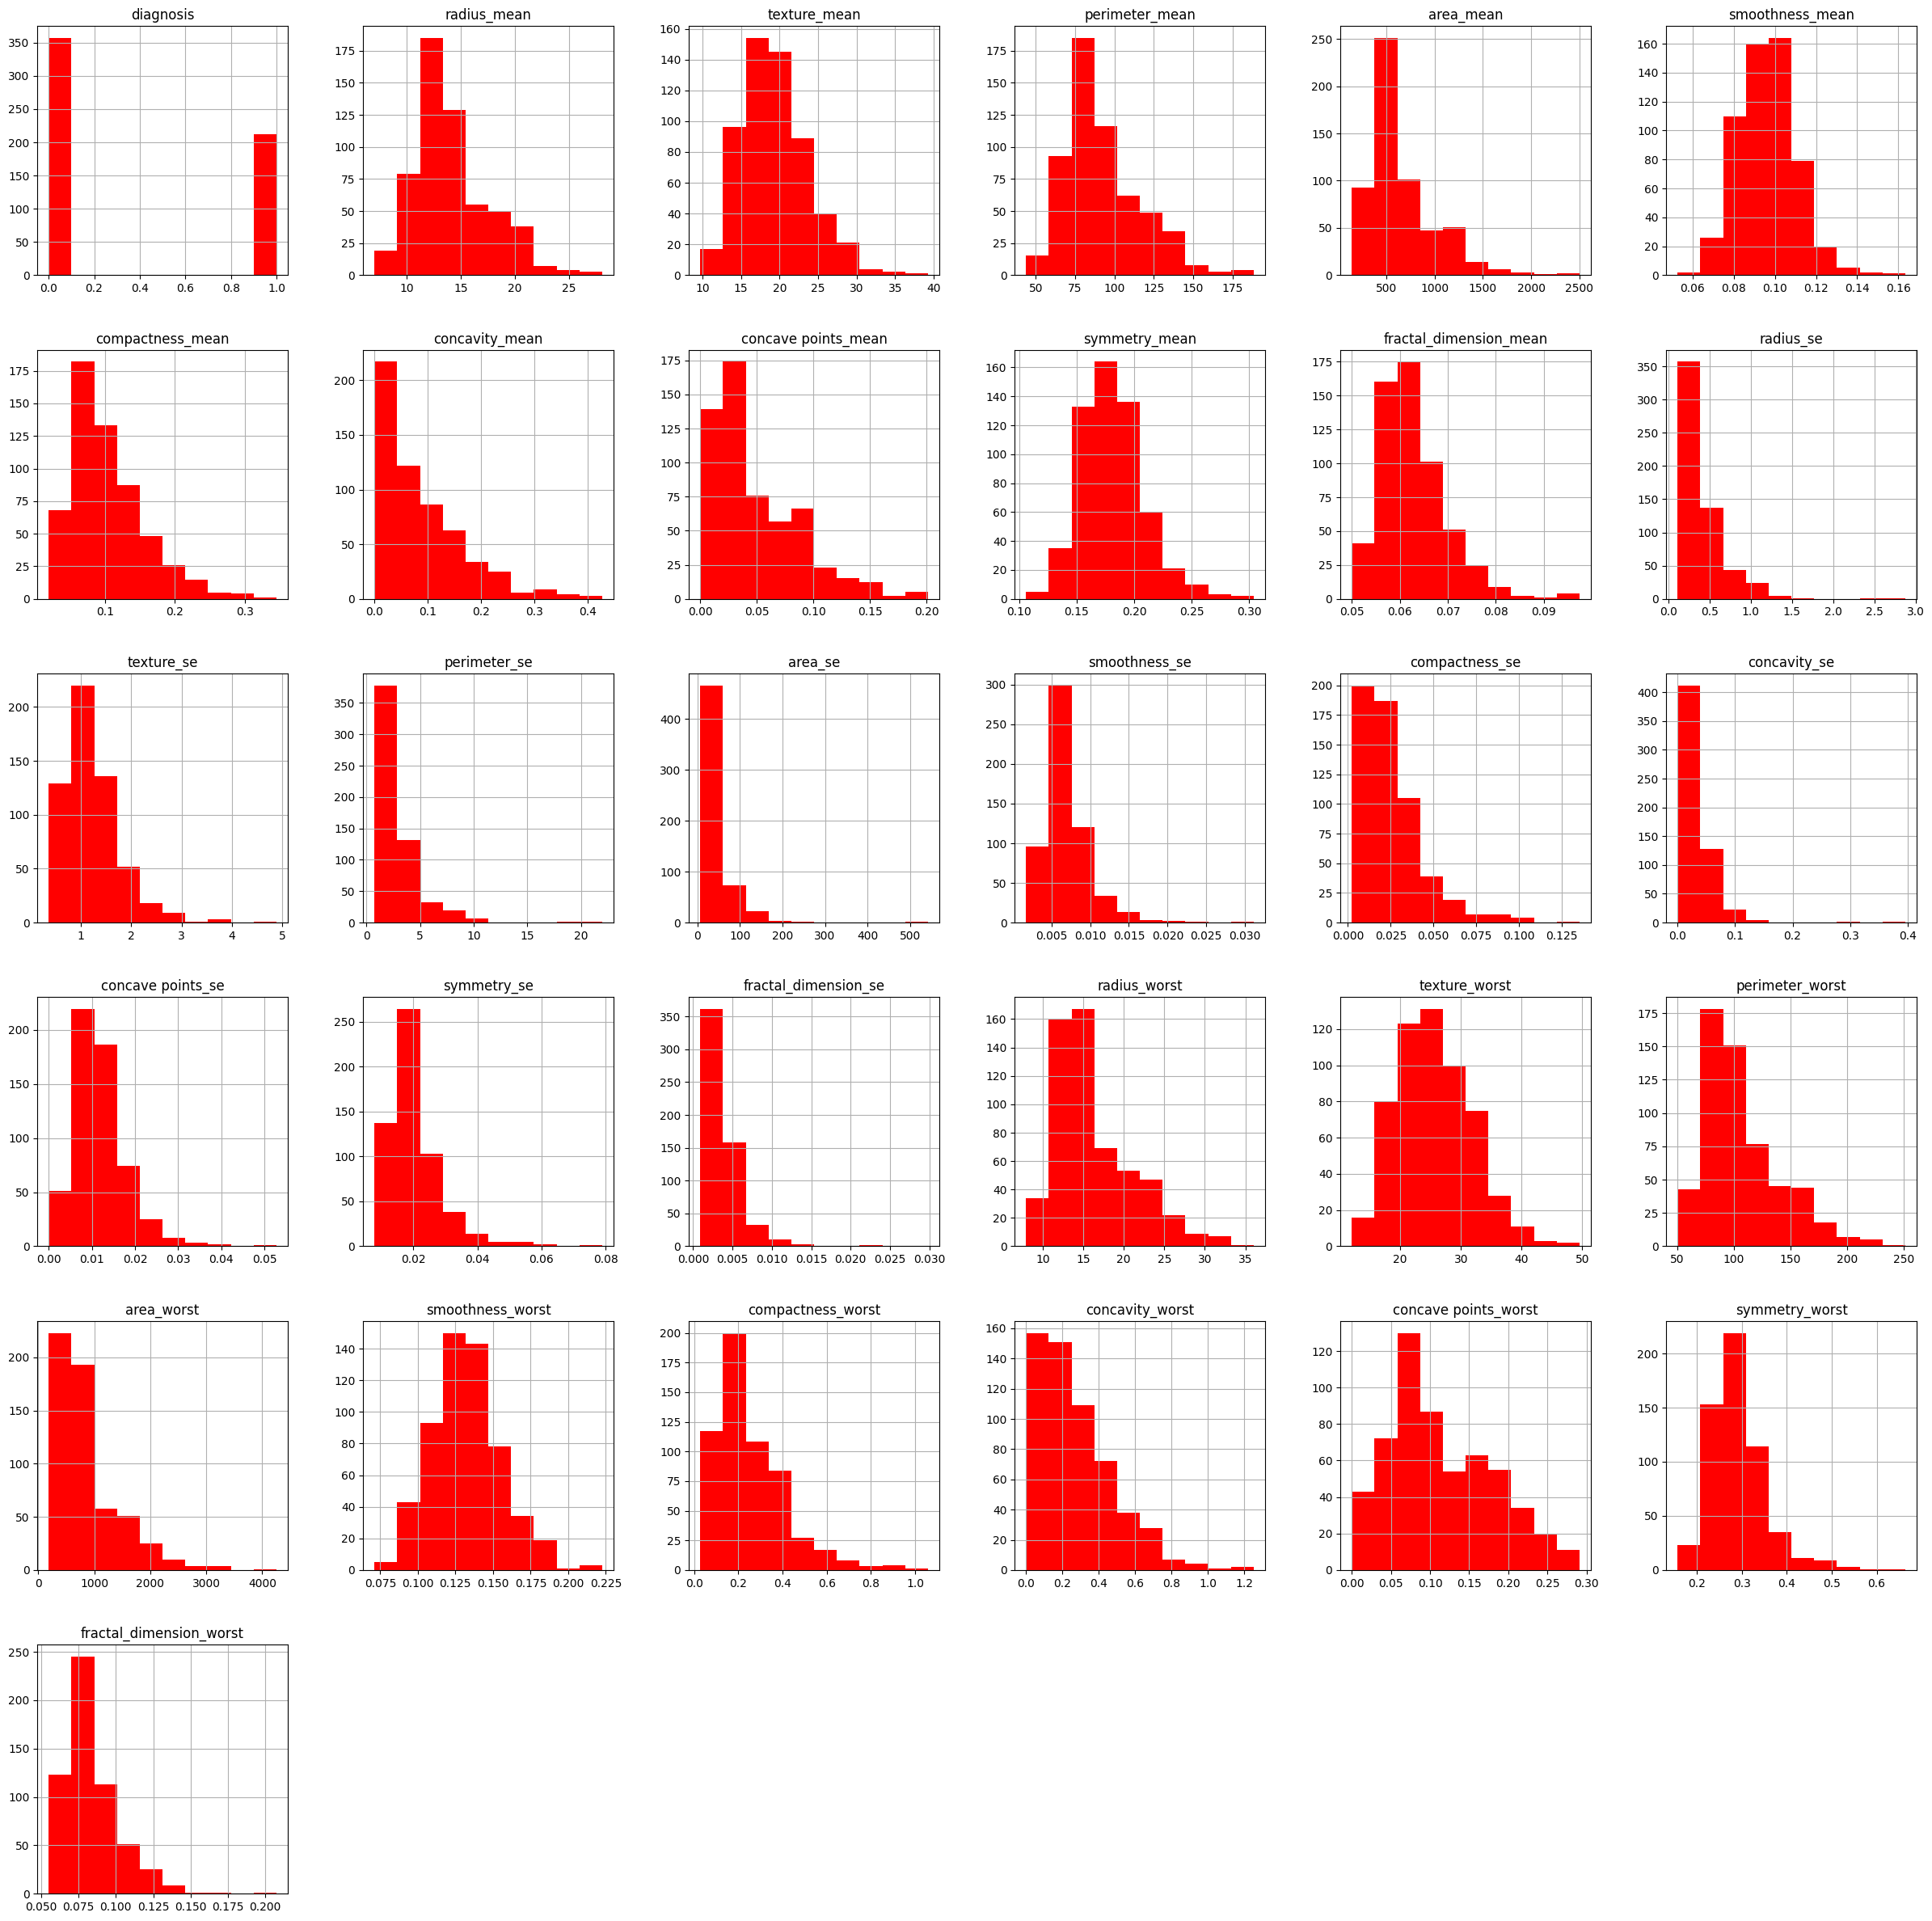

In [9]:
df.hist(figsize = (30,30),color='red')
plt.show()

The highest count of radius_mean values ranges between 11 and 14

The highest count of texture_mean values ranges between 16 and 19

The highest count of perimeter_mean values ranges between 72 and 85 and so on.

BOXPLOT


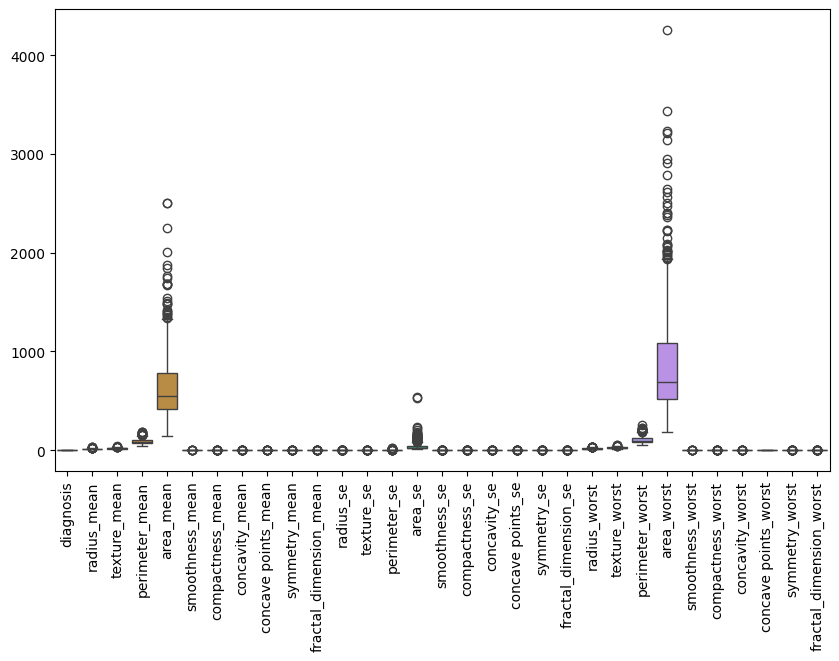

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

dataset has many outliers.some of them are:
area_mean  -values abovve 1500 are treated as outliers.
area_se    -it has one outlier
area_worst  - values abovve 2300 are outliers

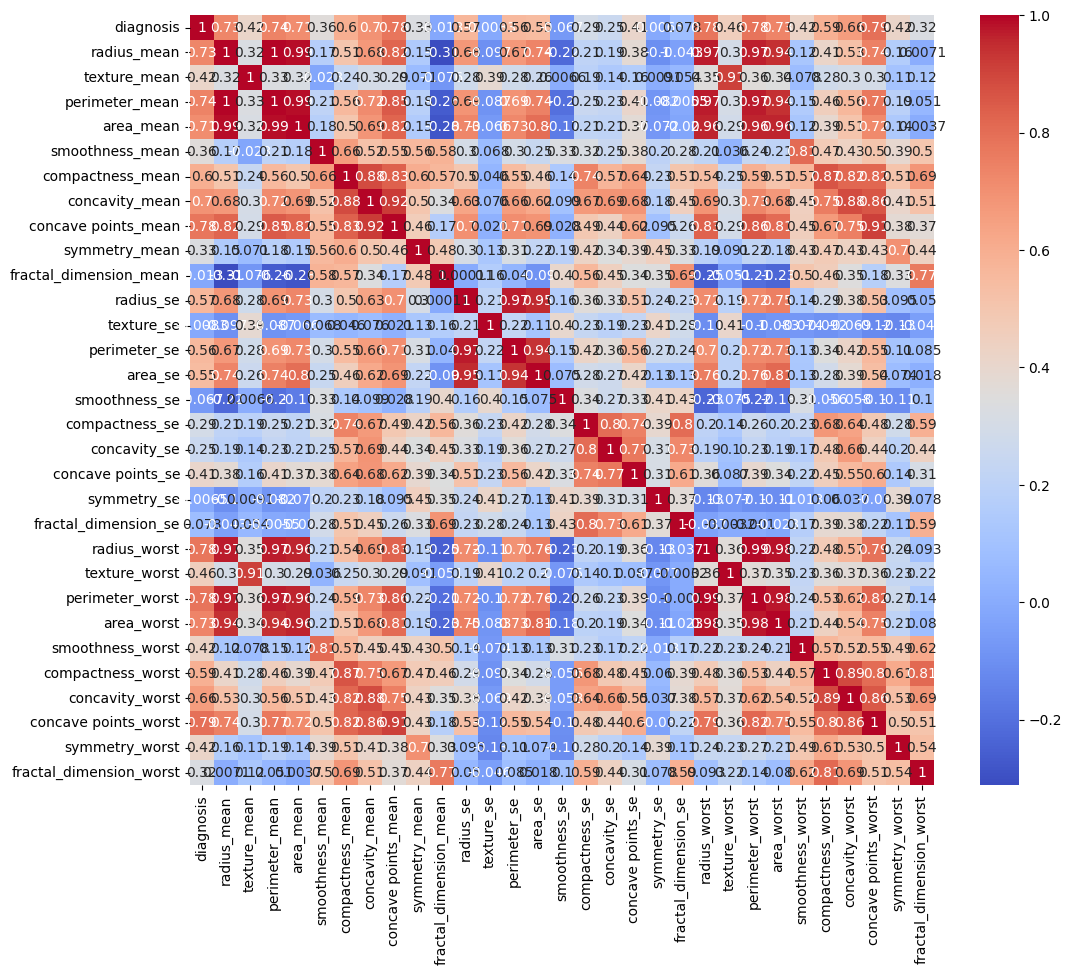

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

concave points_worst,radius_worst,perimeter_worst have the high  correlation with diagnosis.

SCATTERPLOT

<Axes: xlabel='perimeter_mean', ylabel='area_mean'>

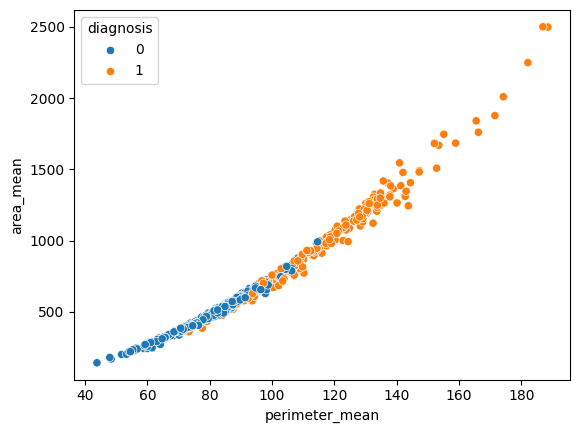

In [12]:
sns.scatterplot(x='perimeter_mean', y='area_mean', data=df,hue='diagnosis')

area_mean,perimeter_mean has high positive correlation

when  perimeter_mean and area_mean are high diagnosis is malignant,otherwise it is benign.

<Axes: xlabel='area_mean', ylabel='radius_mean'>

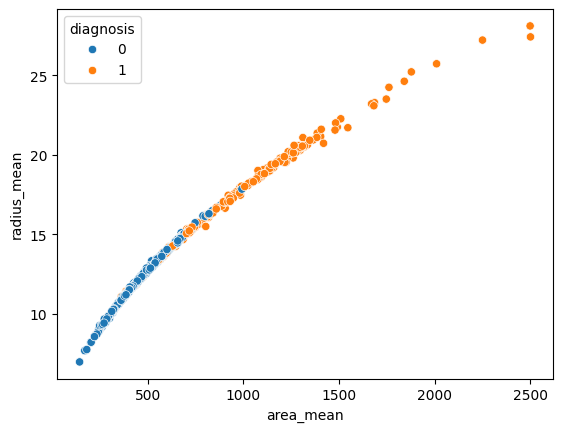

In [13]:
sns.scatterplot(x='area_mean', y='radius_mean', data=df,hue='diagnosis')

area_mean,radius_mean has high positive correlation

when radius_mean and area_mean are high diagnosis is malignant,otherwise it is benign.

SCATTER MULTIPLE

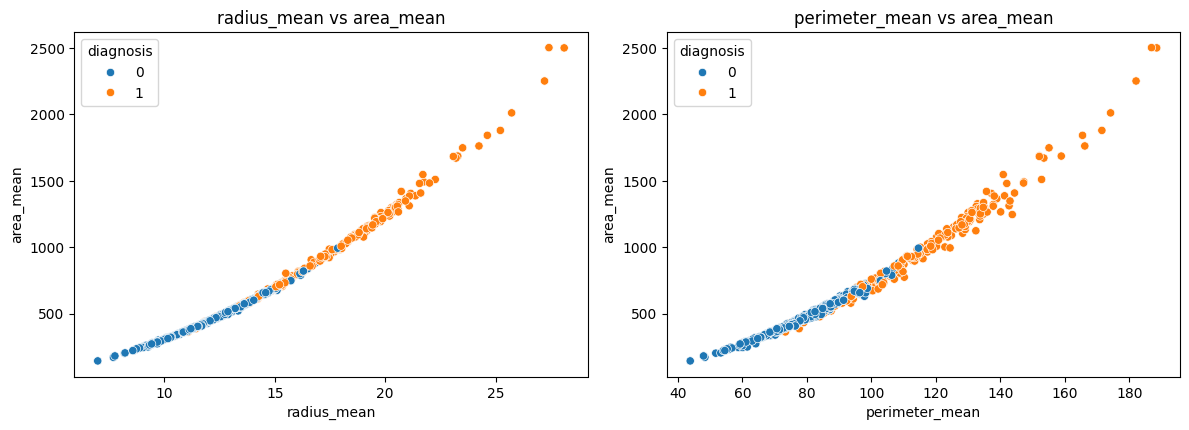

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='radius_mean', y='area_mean', hue='diagnosis')
plt.title('radius_mean vs area_mean')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='perimeter_mean', y='area_mean', hue='diagnosis')
plt.title('perimeter_mean vs area_mean')
plt.tight_layout()
plt.show()

DENSITY PLOT

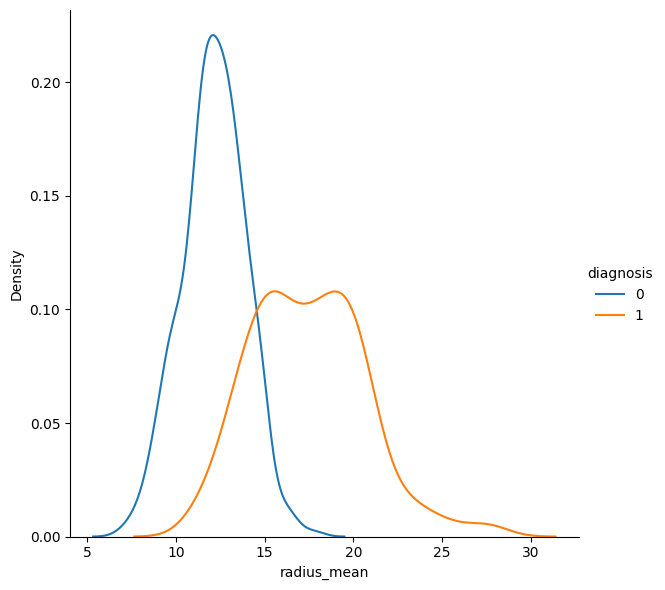

In [15]:
sns.FacetGrid(df, hue="diagnosis", height=6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

there is a less overlap.so radius_mean can be used to predict the diagnosis.

PARALLEL CHART

In [16]:
fig = px.parallel_coordinates(df, color="diagnosis",
                             dimensions=["radius_mean",  "perimeter_mean",
                                         "area_mean"],
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=0.5)
fig.show()

As the radius_mean, perimeter_mean, and area_mean increase, there is a tendency for the diagnosis value to increase towards 1(malignant). This suggests that these variables may be predictive of the diagnosis outcome..

ANDREWS CURVES

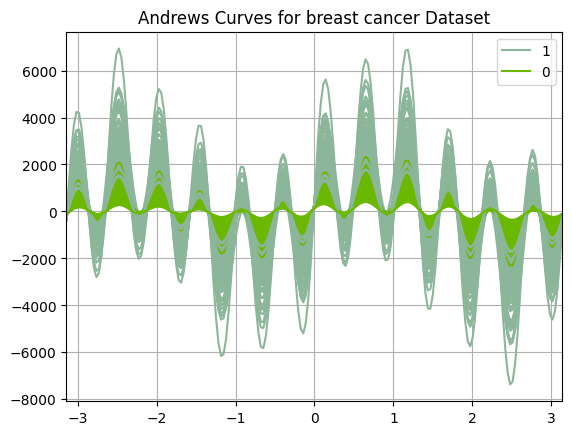

In [17]:
pd.plotting.andrews_curves(df, 'diagnosis')
plt.title('Andrews Curves for breast cancer Dataset')
plt.show()

The curves of two classes overlap, but there is a  distinction in their shapes and spread. The class 0(green) are more tightly clustered around the center, while the class 1 curves (greyish green) are more spread out and have higher amplitude variations. This spread suggests that class 1 has more variability or distinct feature patterns compared to class 0.
class 0 may be benign,class 1 can be malignant or vvice versa